In [65]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
df=pd.read_csv("car data.csv")

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.shape

(301, 9)

In [11]:
# checking unique values in categories
def unique(x):
    values=list(df[x].unique())
    print(values)

In [14]:
print(unique("Owner"))
print(unique("Fuel_Type"))
print(unique("Transmission"))
print(unique("Seller_Type"))

[0, 1, 3]
None
['Petrol', 'Diesel', 'CNG']
None
['Manual', 'Automatic']
None
['Dealer', 'Individual']
None


In [15]:
# checking null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [16]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [22]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [23]:
final_data=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [24]:
final_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [26]:
final_data["current_year"]=2021

In [29]:
final_data['Years_old']=final_data["current_year"]-final_data["Year"]

In [31]:
final_data.drop(["current_year","Year"],axis=1,inplace=True)

In [32]:
final_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [34]:
final_data=pd.get_dummies(final_data,drop_first=True)

In [35]:
final_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


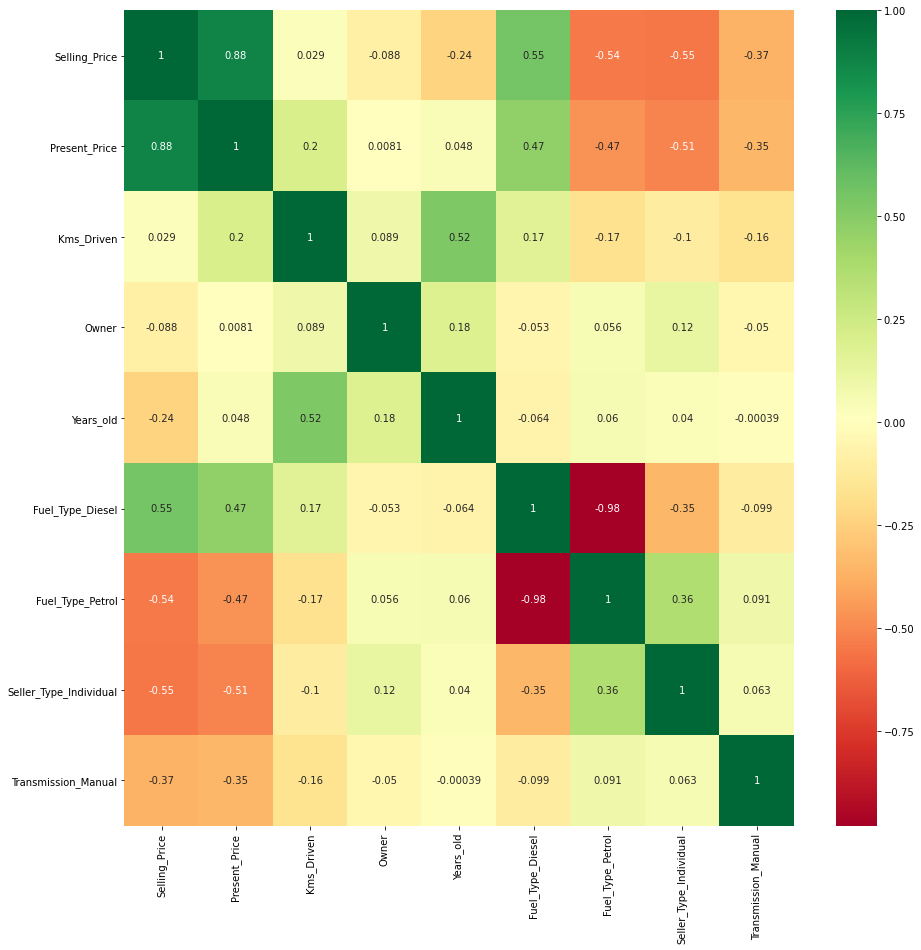

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
corr=final_data.corr()
top_corr_features=corr.index
plt.figure(figsize=(15,15))
# plot heatmap
c=sns.heatmap(final_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [46]:
final_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [51]:
# dependent and independent features
x=final_data.iloc[:,1:]
y=final_data.iloc[:,0]

In [52]:
# feature importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [57]:
features=model.feature_importances_
features

array([0.36498697, 0.03949661, 0.00098804, 0.07652045, 0.23508147,
       0.0135187 , 0.11897337, 0.1504344 ])

In [56]:
# plotting graph of feature importances
feature_impor=pd.Series(features,index=x.columns)
feature_impor

Present_Price             0.364987
Kms_Driven                0.039497
Owner                     0.000988
Years_old                 0.076520
Fuel_Type_Diesel          0.235081
Fuel_Type_Petrol          0.013519
Seller_Type_Individual    0.118973
Transmission_Manual       0.150434
dtype: float64

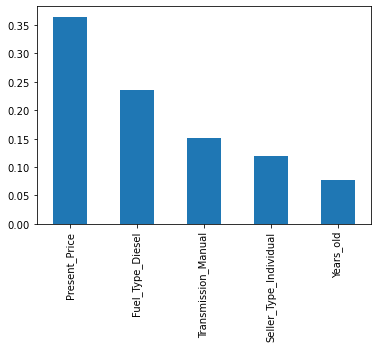

In [61]:
feature_impor.nlargest(5).plot(kind="bar")
plt.show()

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [63]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [67]:
## randomized search cv
# number of trees in random forest
n_estimators=[int(x) for x in np.linspace(100,1200,num=12)]
# no of features in every split
max_features=['auto','sqrt']
# max no of levels
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
# max_depth.append(none)
# min samples required to split
min_samples=[2,5,10,15,100]
# min no of samples at each leaf node
min_samples_leaf=[1,2,5,10]

In [68]:
from sklearn.model_selection import RandomizedSearchCV

In [69]:
random_grid={"n_estimators":n_estimators,
            "max_features":max_features,
            "max_depth":max_depth,
            "min_samples_split":min_samples,
            "min_samples_leaf":min_samples_leaf}

In [70]:
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [71]:
# using random grid fro best parameter
# first create the base model to tune
rf = RandomForestRegressor()

In [75]:
rf_random = RandomizedSearchCV(estimator=rf,param_distributions =random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [76]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [79]:
predictions=rf_random.predict(X_test)
predictions

array([ 6.36951,  0.44786,  8.8137 ,  4.61999,  5.15115,  2.9155 ,
        8.89793,  0.76074,  4.05298,  5.62416,  4.9098 ,  0.90683,
        1.83777,  7.82031,  4.63994, 20.98261,  6.79914,  5.56145,
        1.24368,  4.3614 ,  0.88416,  8.08778, 18.96513,  4.77579,
        2.68658,  0.56756,  3.2677 ,  4.9753 ,  3.79349,  0.61651,
        3.17213,  0.54343,  7.90551,  0.47679,  6.96672,  8.04553,
        0.97593,  7.4467 ,  5.59656,  0.37602,  4.38165,  5.80429,
        3.2427 ,  9.2157 ,  4.73208,  1.25951,  0.94149,  1.01907,
        9.00511,  5.8851 ,  0.40447,  6.5149 ,  4.64545,  0.53128,
        0.57972, 11.8591 ,  0.47611,  4.77499,  5.68414,  0.70107,
        0.45075])

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

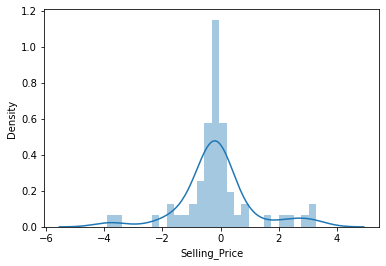

In [82]:
sns.distplot(y_test-predictions)

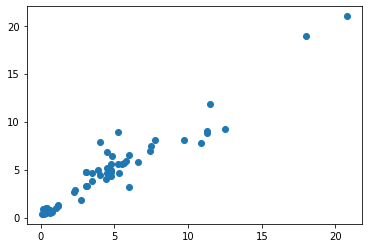

In [84]:
plt.scatter(y_test,predictions)

In [87]:
import pickle
# open a file ,where you store the data
file=open('random_forest_regres_model.pkl','wb')
# dumping information
pickle.dump(rf_random,file)